In [211]:
import numpy as np
import json

In [212]:
HYDROGEN_FINE_LINE = 0.21 # meters
HYDROGEN_PERIOD = 7.04E-10 # seconds

In [213]:

convert_to_hydrogem_line = lambda m: m // HYDROGEN_FINE_LINE
convert_to_hydrogen_period = lambda s: s // HYDROGEN_PERIOD



In [214]:
JUPITER_ORBIT = 778_547_200_000 # meters
JUPITER_DIAMETER = 142_984_000 # meters

JUPITER_PERIOD = 374_247_821 # seconds
JUPITER_ROTATION = 35_280 # seconds

IO_ORBIT = 421_700_000 # meters
IO_DIAMETER = 3_643_000 # meters

IO_PERIOD = 152_064 # seconds

EUROPA_ORBIT = 671_034_000 # meters
EUROPA_DIAMETER = 3_122_000 # meters

EUROPA_PERIOD = 306_720  # seconds


IO_ORBIT = 421_700_000 # meters
IO_DIAMETER = 3_643_000 # meters

IO_PERIOD = 152_064 # seconds

IO_ORBIT = 421_700_000 # meters
IO_DIAMETER = 3_643_000 # meters

IO_PERIOD = 306_720 # seconds

In [215]:
moons = [
    {'name': 'Jupiter',
     'diameter': 139820000,
     'orbit': 778547200000,
     'period': 374247821,
     'rotation': 35280},
    {'name': 'Io',
     'diameter': 3643.2 * 1000,
     'orbit': 421700 * 1000,
     'period': 1.77 * 24 * 60 * 60},
    {'name': 'Europa',
     'diameter': 3121.6 * 1000,
     'orbit': 671034 * 1000,
     'period': 3.55 * 24 * 60 * 60},
    {'name': 'Ganymede',
     'diameter': 5262.4 * 1000,
     'orbit': 1070412 * 1000,
     'period': 7.16 * 24 * 60 * 60},
    {'name': 'Callisto',
     'diameter': 4820.6 * 1000,
     'orbit': 1882709 * 1000,
     'period': 16.69 * 24 * 60 * 60},
]

In [216]:
moons = [{k: int(v) 
          if not isinstance(v, str) 
          else v 
          for k, v in m.items()
          } for m in moons]

In [217]:
moons

[{'name': 'Jupiter',
  'diameter': 139820000,
  'orbit': 778547200000,
  'period': 374247821,
  'rotation': 35280},
 {'name': 'Io', 'diameter': 3643200, 'orbit': 421700000, 'period': 152928},
 {'name': 'Europa', 'diameter': 3121600, 'orbit': 671034000, 'period': 306719},
 {'name': 'Ganymede',
  'diameter': 5262400,
  'orbit': 1070412000,
  'period': 618624},
 {'name': 'Callisto',
  'diameter': 4820600,
  'orbit': 1882709000,
  'period': 1442016}]

In [218]:
with open('D:/Github/pulsar/data/jupiter.json', 'w') as f: 
    json.dump(moons, f, indent=4)

In [219]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd

In [220]:
data = pd.read_json('data/jupiter.json')
data.head()

,name,diameter,orbit,period,rotation
0,Jupiter,139820000,778547200000,374247821,35280.0
1,Io,3643200,421700000,152928,NaN
2,Europa,3121600,671034000,306719,NaN
3,Ganymede,5262400,1070412000,618624,NaN
4,Callisto,4820600,1882709000,1442016,NaN


In [221]:
MOST_DISTANT = 1882709000
CLOSEST = 421700000

WIDTH = MOST_DISTANT + CLOSEST

In [222]:
def plot_binary(code, center, radius, rem=WIDTH // 5000, alpha=np.pi/4):
    t_sin, t_cos = lambda a: a * np.sin(alpha), lambda a: a * np.cos(alpha)
    convert_to_binary = lambda x: np.base_repr(int(x), 2)
    convert_to_km = lambda m: m // 1000
       
    linewidth = 1
    dx, dy = 10 * rem, 10 * rem
    
    code = convert_to_binary(convert_to_km(code)) if not isinstance(code, str) else code
    ref_point = (center + t_cos(radius) + t_cos(dy), t_sin(radius) + t_sin(dy))
    for point in code:
        if point == '1':
            if alpha not in [0, np.pi / 2, 3 * np.pi / 2, np.pi]:
                x0, y0 = ref_point[0] + t_cos(dy) + t_cos(dx), ref_point[1] + t_sin(dy) - t_sin(dx)
                x1, y1 = ref_point[0] + t_cos(dy) - t_cos(dx), ref_point[1] + t_sin(dy) + t_sin(dx)
            else:
                x0, y0 = ref_point[0] + t_cos(dy) - t_sin(dx), ref_point[1] + t_sin(dy) - t_cos(dx)
                x1, y1 = ref_point[0] + t_cos(dy) + t_sin(dx), ref_point[1] + t_sin(dy) + t_cos(dx) 
                               
            plt.plot([x0, x1], 
                     [y0, y1], 
                      c='k', 
                      linewidth = linewidth)
            
            ref_point = (ref_point[0] + t_cos(dy), ref_point[1] + t_sin(dy))            
        
        elif point == '0':

            x0, y0 = ref_point[0] + t_cos(dy), ref_point[1] + t_sin(dy)
            x1, y1 = x0 + t_cos(dx), y0 + t_sin(dx)
            
            plt.plot([x0, x1], 
                     [y0, y1], 
                      c='k', 
                      linewidth = linewidth)
            
            ref_point = (ref_point[0] + t_cos(dx) + t_cos(dy), ref_point[1] + t_sin(dx) + t_sin(dy))
            
        



In [227]:
def plot(df, rem=1, dpi=300):
    def moon(idx, a):
        direc = -1 if a > 0 else 1
        return Circle((direc * data.loc[idx, 'orbit'], 0), 
                      data.loc[idx, 'diameter'] * moon_mult,
                      fill=False,
                      linewidth=rem)
    
    data = df.copy()
    fig, ax = plt.subplots(figsize=(29.7, 21))
    
    width = WIDTH
    height = (21 / 29.7) * width

    xlim = (width // 1.5)
    xoff = CLOSEST * 1.5
    ylim = (height // 1.5)
    
    planet_mult = 2
    moon_mult = 5
    
    fig.set_dpi(dpi)
    ax.set_axis_off()
    
    planet = Circle((0, 0), 
                    data.loc[0, 'diameter'] * planet_mult,
                    fill=False,
                    linewidth=rem)
    
    plot_binary(data.loc[0, 'diameter'], 0, data.loc[0, 'diameter'] * planet_mult, alpha=np.pi/2)
    plot_binary(data.loc[0, 'orbit'], 
                0,
                data.loc[0, 'diameter'] * planet_mult,
                alpha=5*np.pi/4)
    
    a = 0
    for idx in range(1, len(data)):
        ax.add_patch(moon(idx, a))
        plot_binary(data.loc[idx, 'diameter'], 
                    data.loc[idx, 'orbit'] * (-1 if (a > 0) else 1), 
                    data.loc[idx, 'diameter'] * moon_mult,
                    alpha=np.pi/2)
        
        plot_binary(data.loc[idx, 'orbit'], 
                    data.loc[idx, 'orbit'] * (-1 if (a > 0) else 1), 
                    data.loc[idx, 'diameter'] * moon_mult,
                    alpha=5*np.pi/4 if a == 0 else 0)
    
        a += 1

    ax.add_patch(planet)
    
    ax.set_xlim(-xlim - xoff, xlim - xoff)
    ax.set_ylim(-ylim, ylim)
    
    plt.show()

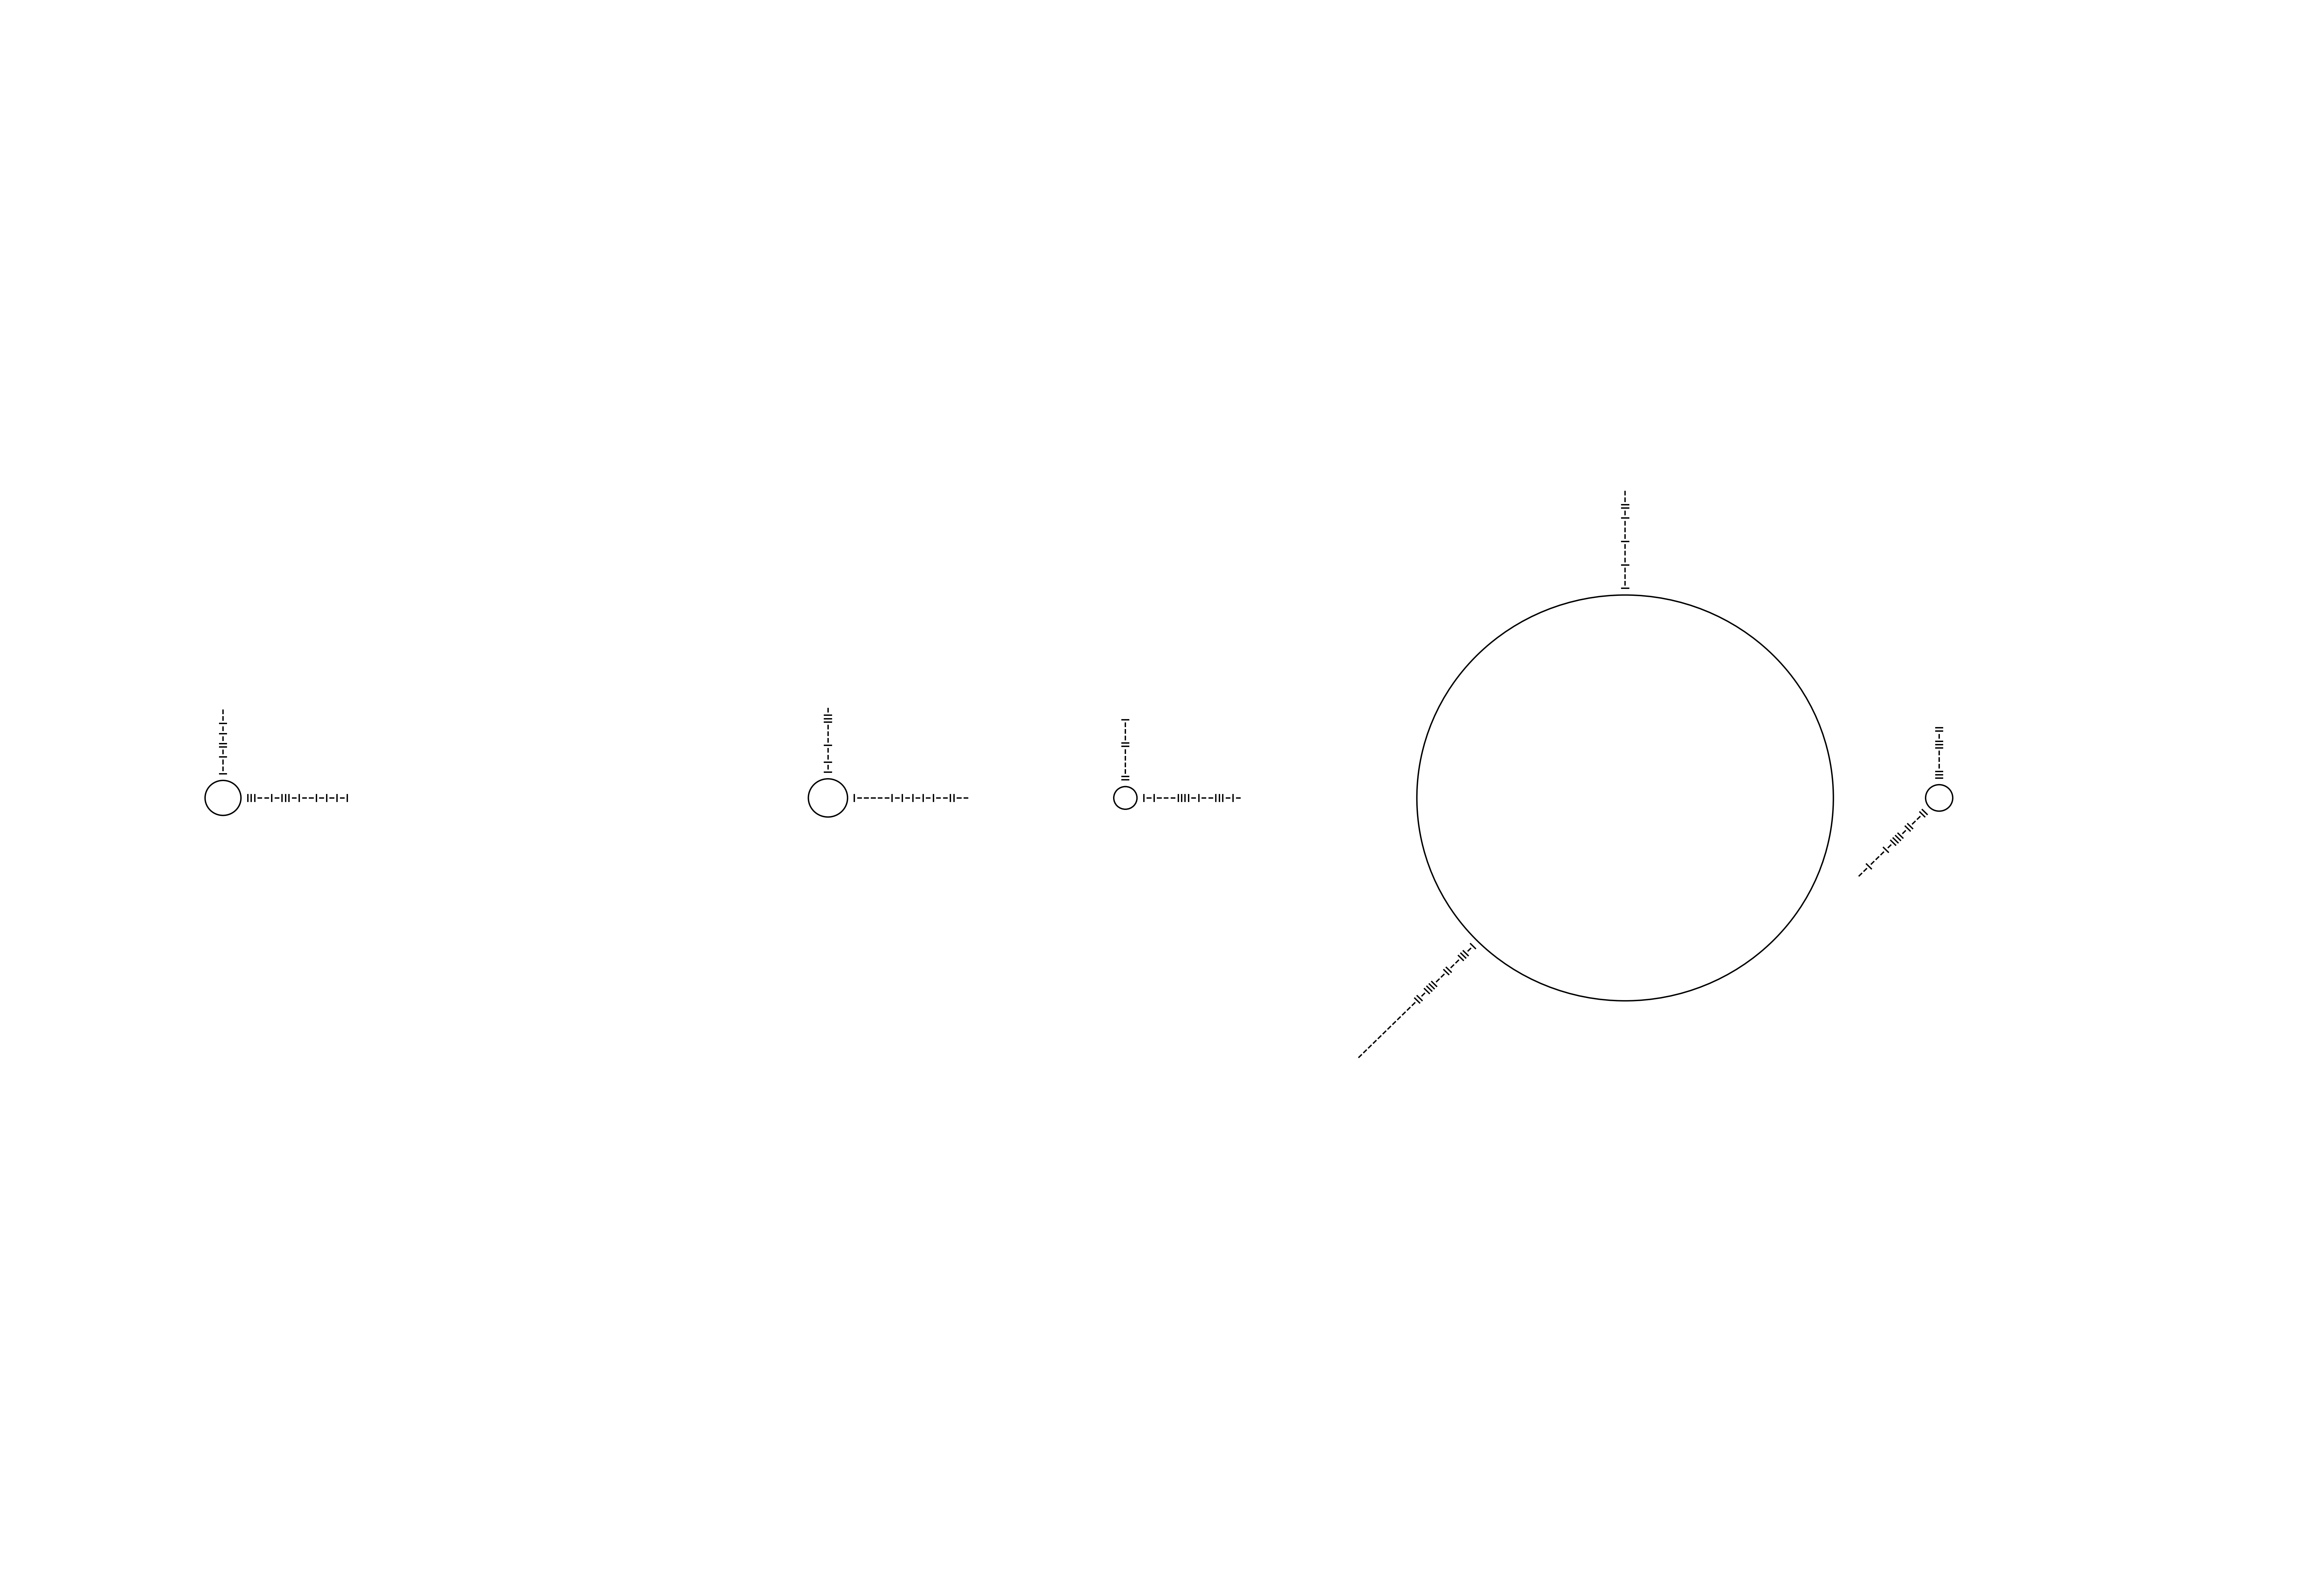

In [228]:
plot(data)